<a href="https://colab.research.google.com/github/yogeshsinghgit/MLProject1/blob/main/Pandas_groupby_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.beer_servings.mean()

106.16062176165804

In [ ]:
drinks.groupby('continent')['beer_servings'].mean()
# for each continent what is the average beer serving.

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

anytime you want to analyse some pandas series by category.

In [ ]:
drinks.groupby('continent')['beer_servings'].max()
# for each continent what is the max beer serving.

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [ ]:
drinks.groupby('continent')['beer_servings'].agg(['count', 'min', 'max', 'mean'])
# agg allows to use multiple aggerigate functions at once.

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [ ]:
drinks.groupby('continent').mean(numeric_only = True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [ ]:
%matplotlib inline

<Axes: xlabel='continent'>

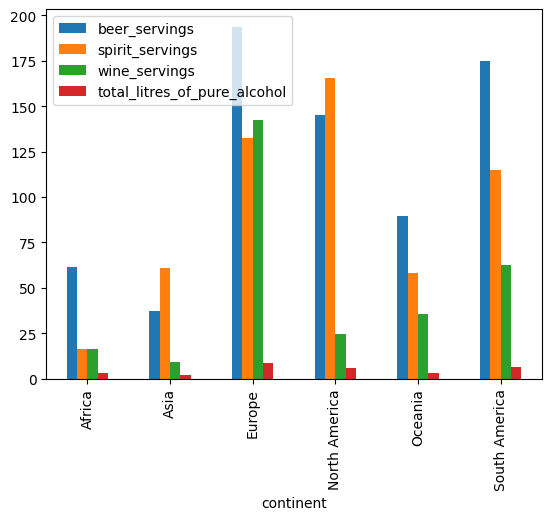

In [ ]:
drinks.groupby('continent').mean(numeric_only = True).plot(kind='bar')

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
# titanic.head()

gp2 = titanic.groupby('survived')['sex'].value_counts()
print(gp2)

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64


In [ ]:
titanic.groupby(['survived', 'sex']).count()

pclass  age  sibsp  parch  fare  embarked  class  who  \
survived sex                                                             
0        female      81   64     81     81    81        81     81   81   
         male       468  360    468    468   468       468    468  468   
1        female     233  197    233    233   233       231    233  233   
         male       109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
survived sex                                                  
0        female          81     6           81     81     81  
         male           468    61          468    468    468  
1        female         233    91          231    233    233  
         male           109    45          109    109    109

In [ ]:
gp2

pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived                                                          
female 0             81   64     81     81    81        81     81   81   
       1            233  197    233    233   233       231    233  233   
male   0            468  360    468    468   468       468    468  468   
       1            109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
sex    survived                                               
female 0                 81     6           81     81     81  
       1                233    91          231    233    233  
male   0                468    61          468    468    468  
       1                109    45          109    109    109

In [ ]:
tips = sns.load_dataset('tips')
# tips.head()

gp3 = tips.groupby(['sex', 'time'])['tip'].mean()
print(gp3)

# Output
sex     time
Male    Lunch     2.882121
        Dinner    3.144839
Female  Lunch     2.582857
        Dinner    3.002115
Name: tip, dtype: float64

sex     time  
Male    Lunch     2.882121
        Dinner    3.144839
Female  Lunch     2.582857
        Dinner    3.002115
Name: tip, dtype: float64


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# average tip pay by male and female at lunch and dinner

tips.groupby(['sex', 'time'])['tip'].mean()

sex     time  
Male    Lunch     2.882121
        Dinner    3.144839
Female  Lunch     2.582857
        Dinner    3.002115
Name: tip, dtype: float64